In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.integrate import odeint
from TIMEcore import modelTIME

In [4]:
state_0 = [80000, 17000, 100, 200] # S, L, I, N

params = {
  'omega' : 0.01594,
  'mu'    : 0.015,
  'muI'   : 0.20,
  'muN'   : 0.20,
  'beta'  : 14.75, 
  'c'     : 0.25,  # rel_inf
  'alpha' : 0.031,
  'x'     : 0.65,  # p
  'nu'    : 0.002, # v
  'sigma' : 0.4,
  'gamma' : 0,     # 1.4,  #kneg i.e. treatment rate  
  'eta'   : 0.83,  # l_s
  'tau'   : 0.76,  # tneg 
  'r'     : 0.25,
  'Sei'   : 0.82,  # 2015
  'Sen'   : 0.57,  # 2015
  'theta' : 0.02,
  'd'     : 0.8    # rel_d
}

times = np.linspace(0, 100, 1001)

In [5]:

out = odeint(modelTIME(**params), state_0, times)
df = pd.DataFrame(np.insert(out,0, times, axis=1), columns=['time', 'S', 'L', 'I', 'N']).set_index('time')
df

,S,L,I,N
time,,,,
0.0,80000.000000,17000.000000,100.000000,200.000000
0.1,79854.348946,17153.247390,99.533385,196.060969
0.2,79710.982504,17304.129818,99.067206,192.288589
0.3,79569.835922,17452.714954,98.602319,188.675810
0.4,79430.846165,17599.068629,98.139518,185.215896
...,...,...,...,...
99.6,33915.833853,65681.048021,175.295553,237.476377
99.7,33907.010533,65690.968901,175.315813,237.503605
99.8,33898.220565,65700.855752,175.336003,237.530738


In [6]:
df['pop']=df[['S','L','I','N']].sum(axis=1)
df

,S,L,I,N,pop
time,,,,,
0.0,80000.000000,17000.000000,100.000000,200.000000,97300.000000
0.1,79854.348946,17153.247390,99.533385,196.060969,97303.190691
0.2,79710.982504,17304.129818,99.067206,192.288589,97306.468116
0.3,79569.835922,17452.714954,98.602319,188.675810,97309.829005
0.4,79430.846165,17599.068629,98.139518,185.215896,97313.270208
...,...,...,...,...,...
99.6,33915.833853,65681.048021,175.295553,237.476377,100009.653804
99.7,33907.010533,65690.968901,175.315813,237.503605,100010.798852
99.8,33898.220565,65700.855752,175.336003,237.530738,100011.943059


In [7]:
state = df.iloc[-1][['S','L','I','N']].to_list() # use final state
params['gamma'] = 1.4
times = np.linspace(0,30,301)

In [8]:
out = odeint(modelTIME(**params), state, times)
df_treat = pd.DataFrame(np.insert(out, 0, times, axis=1), columns=['time', 'S', 'L', 'I', 'N']).set_index('time')
df_treat

,S,L,I,N
time,,,,
0.0,33880.740212,65720.527851,175.376176,237.584725
0.1,33875.692862,65748.207147,163.340400,228.346584
0.2,33877.482221,65767.672640,152.505315,219.692359
0.3,33885.439490,65779.711741,142.749434,211.590817
0.4,33898.963246,65785.034159,133.963666,204.011582
...,...,...,...,...
29.6,49182.104332,52608.268740,43.667628,85.007707
29.7,49224.551385,52572.908140,43.641050,84.955829
29.8,49266.937486,52537.610589,43.614517,84.904038


In [9]:
df_treat['pop']=df[['S','L','I','N']].sum(axis=1)
df_treat


,S,L,I,N,pop
time,,,,,
0.0,33880.740212,65720.527851,175.376176,237.584725,97300.000000
0.1,33875.692862,65748.207147,163.340400,228.346584,97303.190691
0.2,33877.482221,65767.672640,152.505315,219.692359,97306.468116
0.3,33885.439490,65779.711741,142.749434,211.590817,97309.829005
0.4,33898.963246,65785.034159,133.963666,204.011582,97313.270208
...,...,...,...,...,...
29.6,49182.104332,52608.268740,43.667628,85.007707,98641.034426
29.7,49224.551385,52572.908140,43.641050,84.955829,98644.618222
29.8,49266.937486,52537.610589,43.614517,84.904038,98648.194287


<Axes: title={'center': 'treatment: $\\gamma: 1.4$'}, xlabel='time'>

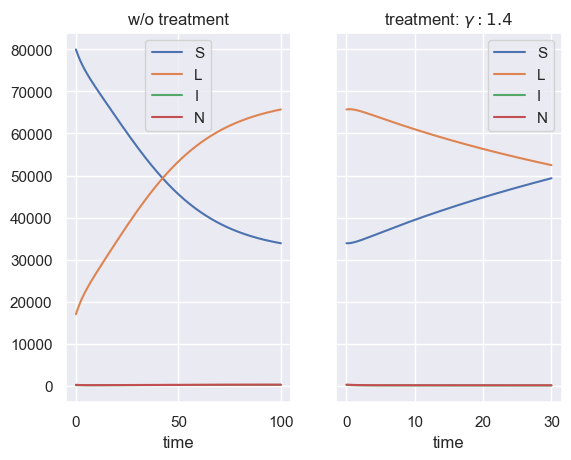

In [10]:
sns.set()

containers = ['S', 'L', 'I', 'N']

fig, axs = plt.subplots(1, 2, sharey=True)

df[containers].plot(ax=axs[0], title='w/o treatment')
df_treat[containers].plot(ax=axs[1], title='treatment: $\\gamma: 1.4$')

<Axes: title={'center': 'treatment: $\\gamma: 1.4$'}, xlabel='time'>

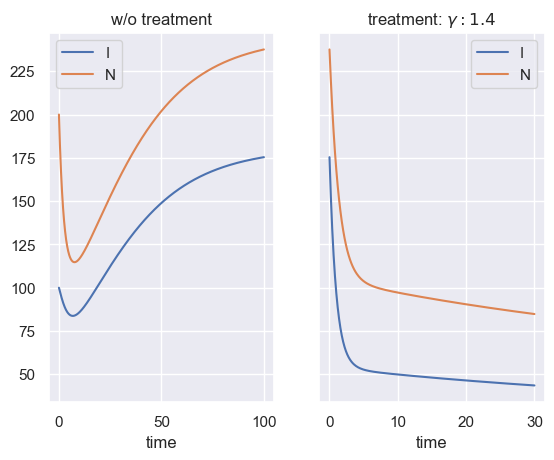

In [11]:
fig, axs = plt.subplots(1, 2, sharey=True)

df[['I', 'N']].plot(ax=axs[0], title='w/o treatment')
df_treat[['I', 'N']].plot(ax=axs[1], title='treatment: $\\gamma: 1.4$')